In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [7]:
MOVING_FP = "/data1/peerd/ghoshr/segmentation_tools/data/sam_data/if/nd2_files/20250208_NP_TT_XeniumRun_5_NaKCD45AF555/0032783/Region_1.nd2"
FIXED_FP = "/data1/peerd/ghoshr/sam_segmentation_results/0032783_Region_1/.checkpoints/fixed.tiff"
MOVING_TIFF_FP = "/data1/peerd/ghoshr/sam_segmentation_results/0032783_Region_1/.checkpoints/moving.tiff"

In [4]:
import nd2

with nd2.ND2File(MOVING_FP) as nd2_file:
    channel_names = nd2_file._channel_names
    for name in channel_names:
        print(name)

RFP 
DAPI


In [13]:
# fixed = tifffile.imread(
#     FIXED_FP,
#     series=0,
#     level=0,
#     key=0,
# )

moving = tifffile.imread(
    MOVING_TIFF_FP,
    series=0,
    level=0,
    key=1,
)

In [ ]:
crop_region = (slice(9000, 11000), slice(9000, 11000))
# fixed_cropped = fixed[crop_region]
moving_cropped = moving[crop_region]

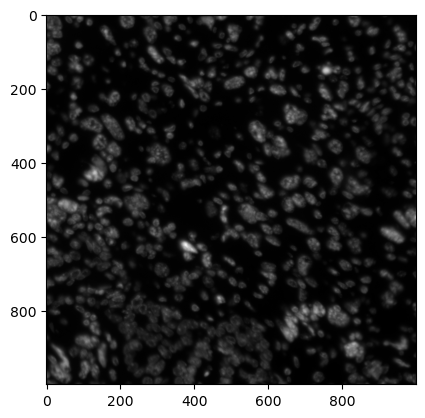

In [14]:
plt.imshow(moving[10000:11000, 10000:11000], cmap='gray')

In [ ]:
from skimage.metrics import structural_similarity as ssim

ssim_index, ssim_image = ssim(
    fixed_cropped / 65535,
    moving_cropped,
    full=True,
    data_range = 1.0
)

print(ssim_index)
plt.imshow(ssim_image, cmap='gray')

In [ ]:
def create_rgb_overlay(fixed, moving):
    fixed = fixed.astype(np.float32)
    moving = moving.astype(np.float32)

    # Normalize to [0,1] range
    if fixed.max() > 0:
        fixed /= fixed.max()
    if moving.max() > 0:
        moving /= moving.max()

    # Create RGB without perceptual scaling
    rgb = np.zeros((*fixed.shape, 3), dtype=np.float32)
    rgb[..., 0] = fixed  # R
    rgb[..., 1] = moving  # G
    rgb[..., 2] = moving  # B

    rgb = np.clip(rgb, 0, 1)  # Ensure values are in [0, 1]
    return rgb

overlay = create_rgb_overlay(fixed_cropped, moving_cropped)
plt.imshow(overlay)
plt.show()